In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#load data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head().T

,0,1,2,3,4
employee_id,65438,65141,7513,2542,48945
department,Sales & Marketing,Operations,Sales & Marketing,Sales & Marketing,Technology
region,region_7,region_22,region_19,region_23,region_26
education,Master's & above,Bachelor's,Bachelor's,Bachelor's,Bachelor's
gender,f,m,m,m,m
recruitment_channel,sourcing,other,sourcing,other,other
no_of_trainings,1,1,1,2,1
age,35,30,34,39,45
previous_year_rating,5,5,3,1,3
length_of_service,8,4,7,10,2


# EDA

In [4]:
print("Shape of Train Dataset: ",train.shape)
print("Shape of Test Dataset: ",test.shape)

Shape of Train Dataset:  (54808, 13)
Shape of Test Dataset:  (23490, 12)


In [5]:
#EDA
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


Text(0.5, 0.98, 'Numerical Variables')

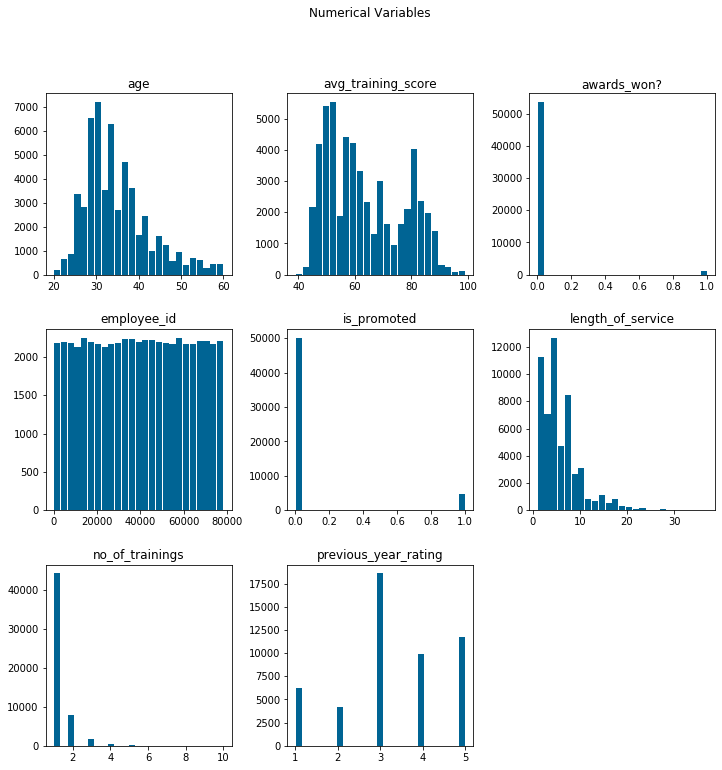

In [7]:
#numerical variables including target

ax = train.hist(bins=25, grid=False, figsize=(12,12),color='#006494',zorder=2, rwidth=0.9)
plt.suptitle("Numerical Variables")

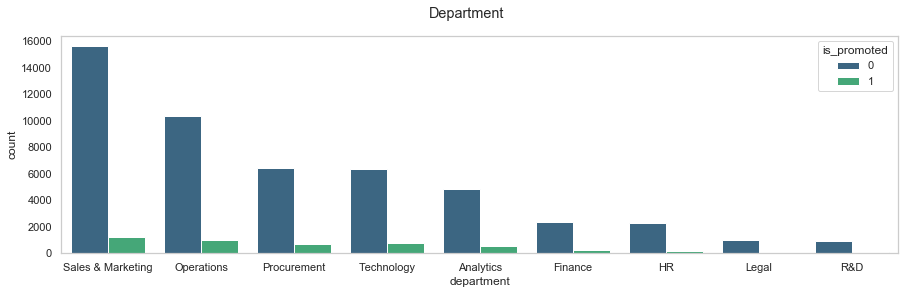

In [27]:
# categorical features - department
plt.figure(figsize=(15,4))
ax = sns.countplot(x="department",data=train, palette="viridis",hue="is_promoted", order = train['department'].value_counts().index)
ax.grid(False)
plt.suptitle("Department")
plt.show()

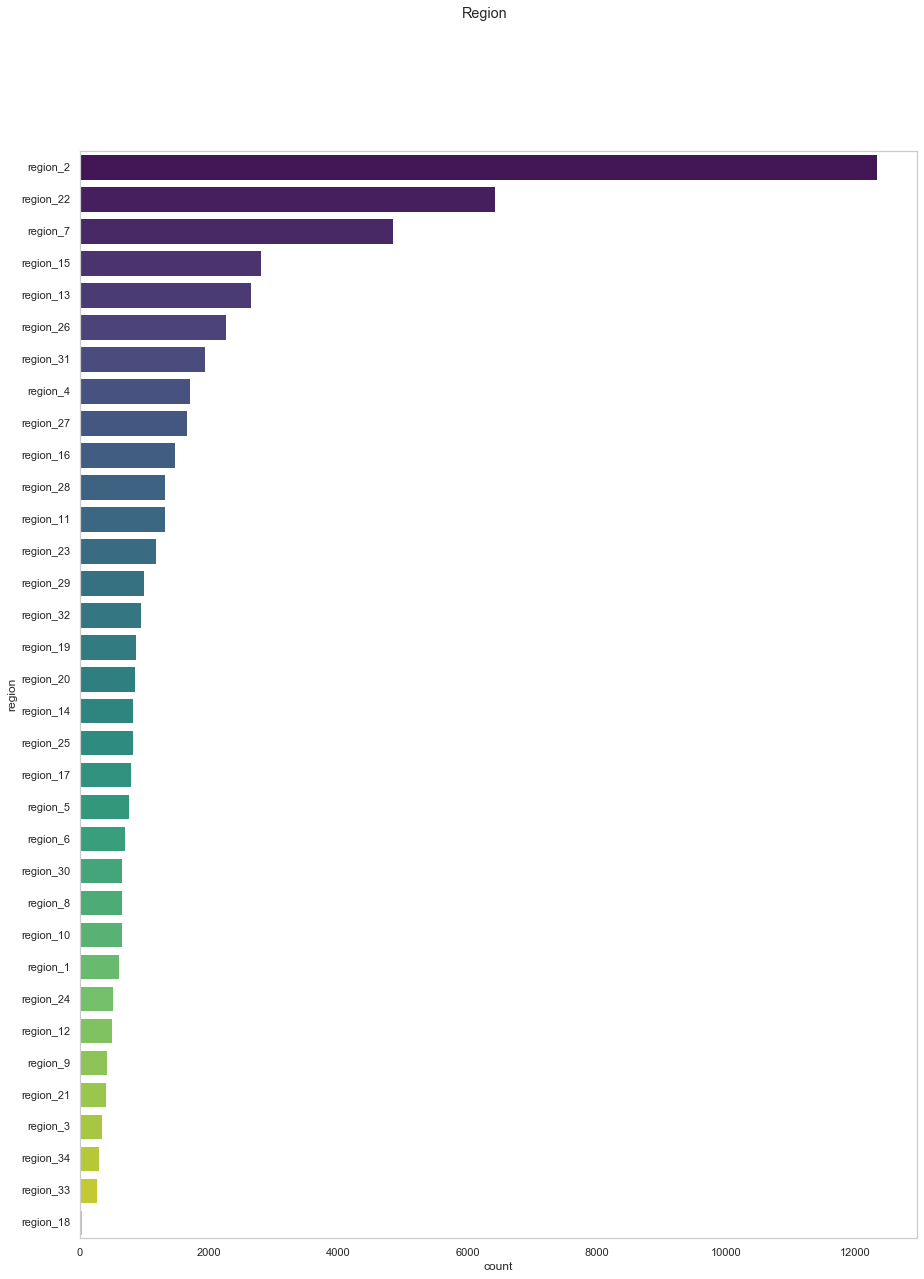

In [23]:
# categorical features - region
plt.figure(figsize=(15,20))
ax = sns.countplot(y="region",data=train, 
                    palette="viridis", order = train['region'].value_counts().index)
ax.grid(False)
sns.set(style="whitegrid")
plt.suptitle("Region")
plt.show()

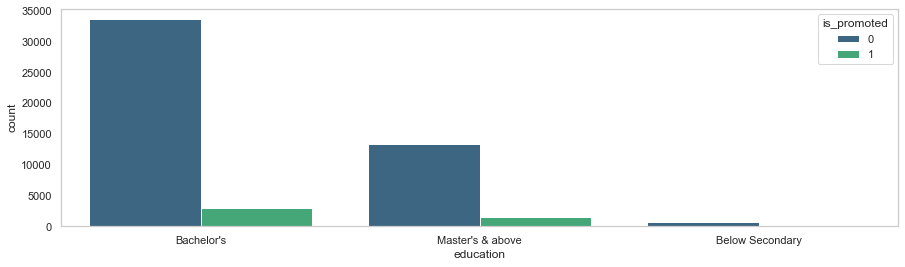

In [25]:
# categorical features - education
plt.figure(figsize=(15,4))
ax = sns.countplot(x="education",data=train, palette="viridis",hue="is_promoted", order = train['education'].value_counts().index)
ax.grid(False)
sns.set(style="whitegrid")
plt.show()

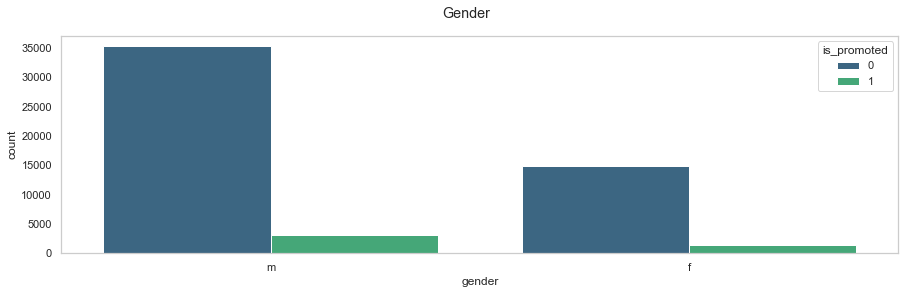

In [28]:
# categorical features - gender
plt.figure(figsize=(15,4))
ax = sns.countplot(x="gender",data=train, palette="viridis",hue="is_promoted", order=train['gender'].value_counts().index)
sns.set(style="whitegrid")
ax.grid(False)
plt.suptitle("Gender")
plt.show()

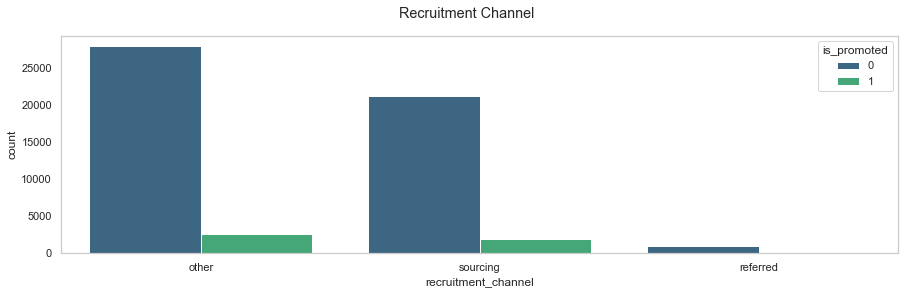

In [29]:
# categorical features - recruitment_channel
plt.figure(figsize=(15,4))
ax = sns.countplot(x="recruitment_channel",data=train, palette="viridis",hue="is_promoted", order=train['recruitment_channel'].value_counts().index)
ax.grid(False)
sns.set(style="whitegrid")
plt.suptitle("Recruitment Channel")
plt.show()

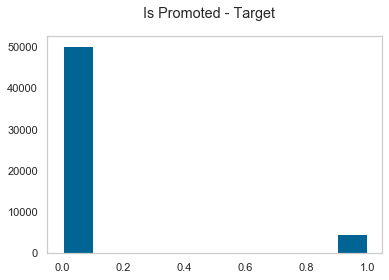

In [30]:
ax = train.is_promoted.hist(color='#006494')
ax.grid(False)
plt.suptitle("Is Promoted - Target")
plt.show()

In [ ]:
train.is_promoted.value_counts(normalize=True)

In [ ]:
train.is_promoted.value_counts()

# Preprocessing

In [ ]:
#merge train and test for preprocessing
df = train
df = df.append(test)
df.shape

## Missing Values

In [ ]:
#checking missing values
print("Education NA: ",(df.education.isna().sum()/len(df))*100)
print("Previous Year Rating NA: ",(df.previous_year_rating.isna().sum()/len(df))*100)

In [ ]:
df.education.value_counts(normalize=True)

In [ ]:
#treating na as a new category called missing
df['education'] = df['education'].fillna('Missing')
df.education.value_counts(normalize=True,dropna=False)

In [ ]:
df.previous_year_rating.value_counts(normalize=True)

In [ ]:
df.previous_year_rating.median()

In [ ]:
#replace missing value with median
df['previous_year_rating'] = df['previous_year_rating'].fillna(3.0)
df.previous_year_rating.value_counts(normalize=True,dropna=False)

## One Hot Encoder

In [ ]:
#onehotencoder -> cat features
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categories='auto')
ohe_arr = ohe.fit_transform(df[['department','region','education','gender','recruitment_channel']]).toarray()
ohe_labels = ohe.get_feature_names(['department','region','education','gender','recruitment_channel'])
ohe_df = pd.DataFrame(ohe_arr, columns= ohe_labels)
ohe_df.head()

In [ ]:
#drop columns and concat both dataframes
df.drop(columns= ['department','region','education','gender','recruitment_channel'], inplace=True)
df = pd.concat([df,ohe_df],axis=1,join='inner')
df.info() 


### Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['no_of_trainings','age','previous_year_rating','length_of_service','awards_won?','avg_training_score']] = scaler.fit_transform(df[['no_of_trainings','age','previous_year_rating','length_of_service','awards_won?','avg_training_score']])
df.head()

In [ ]:
#separate train and test datasets
train, test = df[~df['is_promoted'].isnull()], df[df['is_promoted'].isnull()]
print("Shape of Train Dataset: ",train.shape)
print("Shape of Test Dataset: ",test.shape)

### Random Seed

In [ ]:
seed_value = 12321
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
np.random.seed(seed_value)

### Validation Data

In [ ]:
train.drop(columns=['employee_id'],inplace=True)
print("Shape of Train Dataset: ",train.shape)

In [ ]:
# train valid split
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(train.drop(columns=['is_promoted']),train['is_promoted'], test_size=0.3,random_state=seed_value)
print("Shape of Train Dataset: ",train.shape)
print("Shape of Test Dataset: ",test.shape)

### Feature Selection

In [ ]:
#determine the mutual information
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train,y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

In [ ]:
from sklearn.feature_selection import SelectKBest

select_top40 = SelectKBest(mutual_info_classif,k=40)
select_top40.fit(X_train,y_train)
X_train.columns[select_top40.get_support()]

In [ ]:
feat_select = X_train.columns[select_top40.get_support()]
X_train[feat_select].head(5)

## Classification Models

In [ ]:
#import modules

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
#defining learning classifiers

names = ["Nearest_Neighbors","RBF_SVM", "Decision_Tree", "Random_Forest","AdaBoost","Naive_Bayes"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=1, gamma=2),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB()]
  

In [ ]:
# calculating models scores
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_valid, y_valid)
    scores.append(score)

models = pd.DataFrame()
models['name'] = names
models['score'] = scores
models.sort_values(by='score',ascending=False)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, precision_score,recall_score
import scikitplot as skplt

adc = AdaBoostClassifier(n_estimators=100)
adc.fit(X_train, y_train)
preds_valid = adc.predict(X_valid)
skplt.metrics.plot_confusion_matrix(y_valid, preds_valid)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print("Accuracy: ",accuracy_score(y_valid,preds_valid))
print("Recall: ",recall_score(y_valid,preds_valid))
print("Precision: ",precision_score(y_valid,preds_valid))

In [ ]:
# model only the top_40 features
adc.fit(X_train[feat_select], y_train)
preds_valid = adc.predict(X_valid[feat_select])
skplt.metrics.plot_confusion_matrix(y_valid, preds_valid)
plt.title('Confusion Matrix - Feature Selection')
plt.show()

In [ ]:
print("Accuracy: ",accuracy_score(y_valid,preds_valid))
print("Recall: ",recall_score(y_valid,preds_valid))
print("Precision: ",precision_score(y_valid,preds_valid))

## Desbalanced Target

In [ ]:
#oversampling class 1

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros,y_ros= ros.fit_resample(X_train[feat_select],y_train)
y_ros.value_counts()

In [ ]:
adc.fit(X_ros[feat_select], y_ros)
preds_valid = adc.predict(X_valid[feat_select])
skplt.metrics.plot_confusion_matrix(y_valid, preds_valid)
plt.title('Confusion Matrix - Oversampling Class 1')
plt.show()


In [ ]:
print("Accuracy: ",accuracy_score(y_valid,preds_valid))
print("Recall: ",recall_score(y_valid,preds_valid))
print("Precision: ",precision_score(y_valid,preds_valid))

In [ ]:
#undersampling - tomek_links

from imblearn.under_sampling import TomekLinks

t1 = TomekLinks()
X_t1,y_t1= t1.fit_resample(X_train[feat_select],y_train)
y_t1.value_counts()


In [ ]:
adc.fit(X_t1[feat_select], y_t1)
preds_valid = adc.predict(X_valid[feat_select])
skplt.metrics.plot_confusion_matrix(y_valid, preds_valid)
plt.title('Confusion Matrix - Tomek links')
plt.show()

In [ ]:
print("Accuracy: ",accuracy_score(y_valid,preds_valid))
print("Recall: ",recall_score(y_valid,preds_valid))
print("Precision: ",precision_score(y_valid,preds_valid))